Dataset: https://www.kaggle.com/datasets/ashydv/country-socioeconomic-data?select=Country-data.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


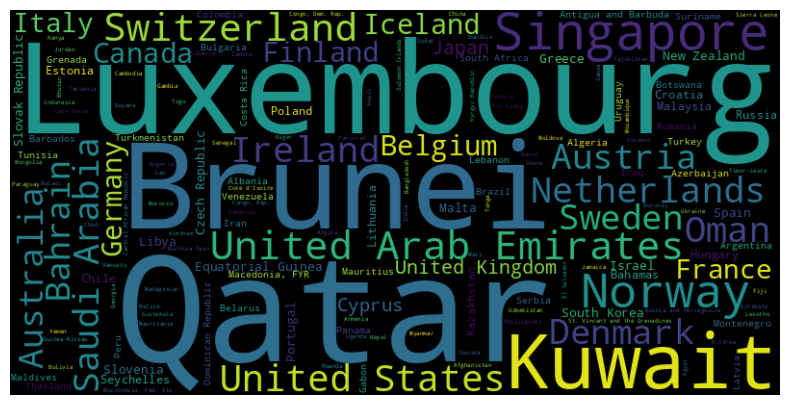

In [7]:
country_income_dict = dict(zip(df['country'], df['income']))

# Generate the word cloud, using the income as the frequency of each country
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(country_income_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

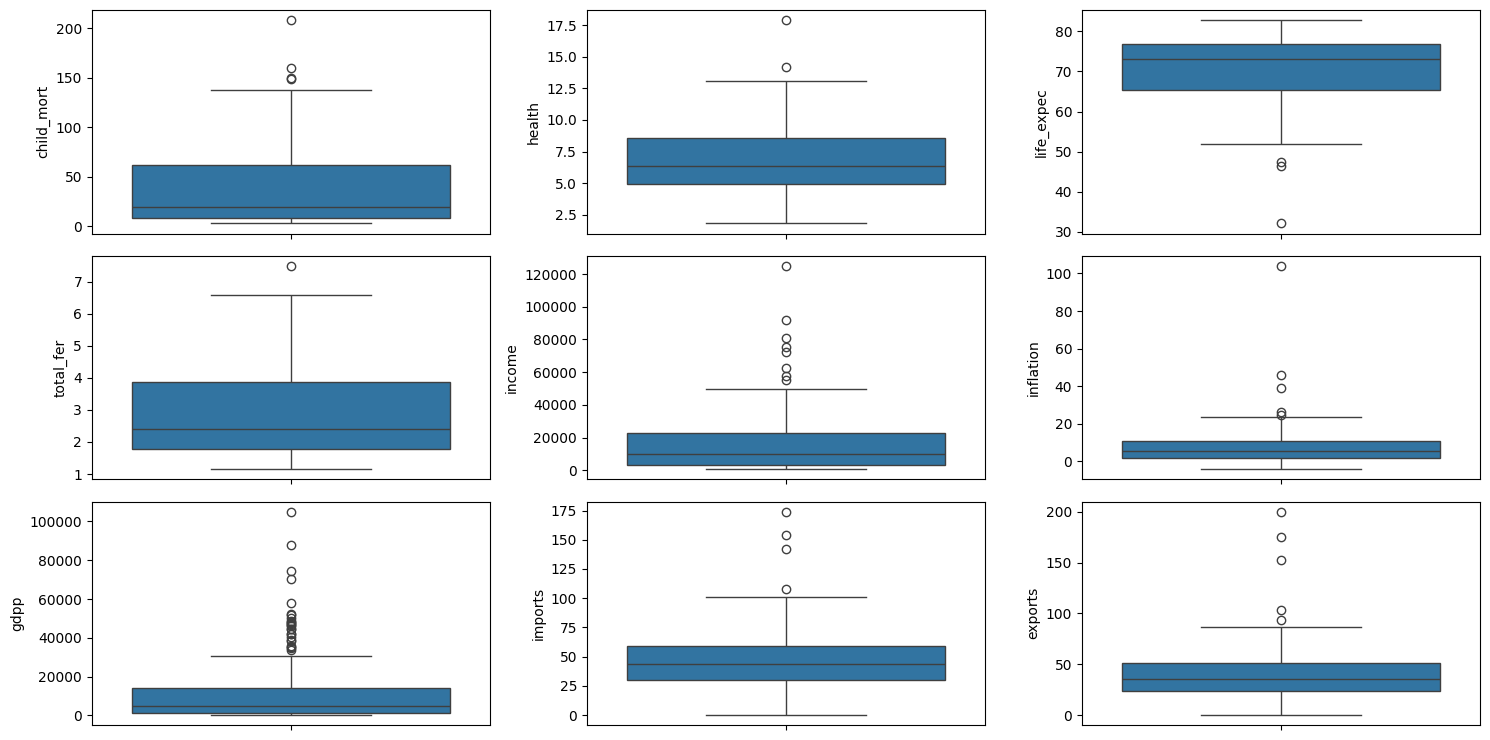

In [8]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])


plt.tight_layout()

In [9]:
def remove_outliers(df):
    # Initialize an empty DataFrame to store the cleaned data
    df_clean = pd.DataFrame()

    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:  # Apply only to numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out the outliers
            df_clean[col] = df[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)
        else:
            df_clean[col] = df[col]

    return df_clean

# Remove outliers from the dataset
df_clean = remove_outliers(df)

# Drop rows with NaN values (i.e., where outliers were removed)
df_clean = df_clean.dropna()

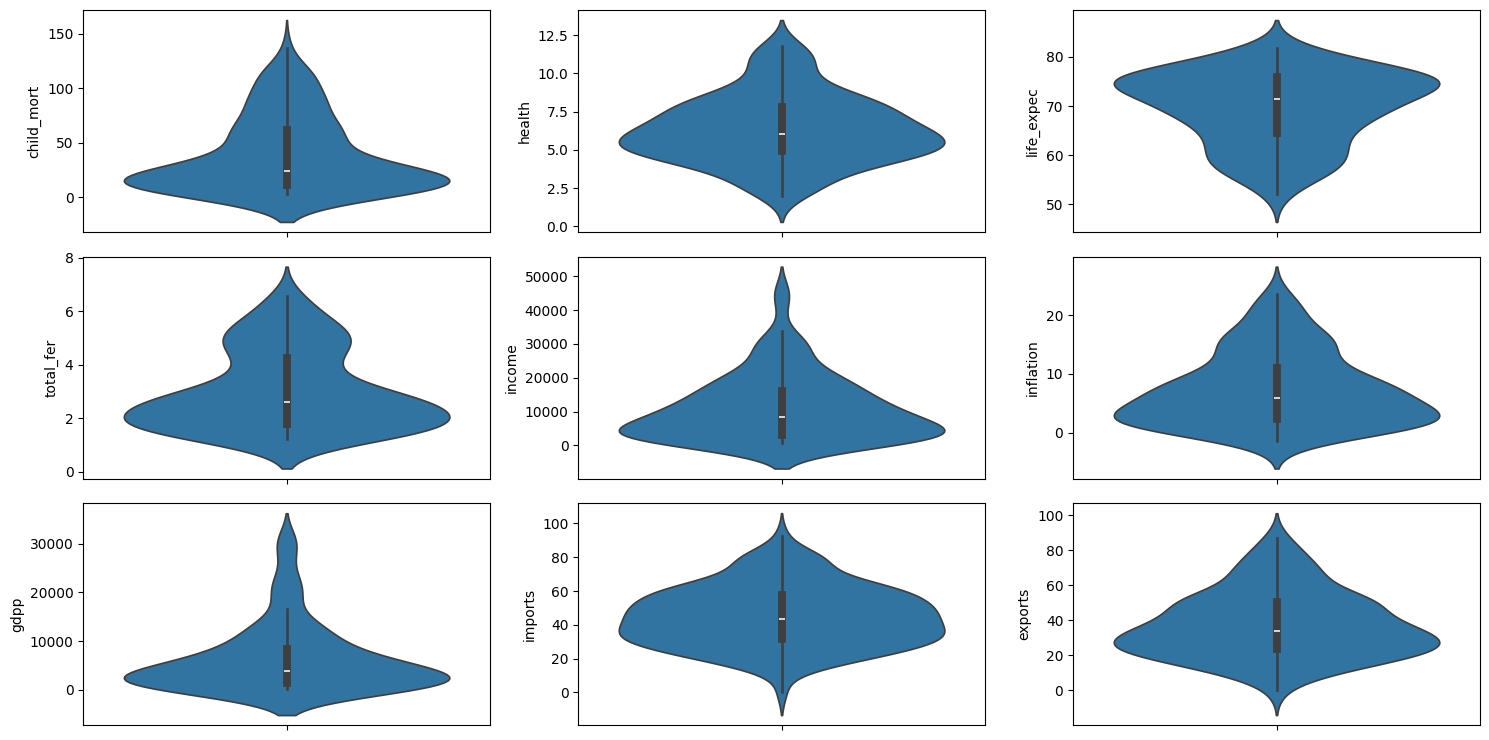

In [10]:
fig, axs = plt.subplots(3,3, figsize=(15,7.5))
plt1 = sns.violinplot(df_clean['child_mort'], ax=axs[0,0])
plt2 = sns.violinplot(df_clean['health'], ax=axs[0,1])
plt3 = sns.violinplot(df_clean['life_expec'], ax=axs[0,2])
plt4 = sns.violinplot(df_clean['total_fer'], ax=axs[1,0])
plt5 = sns.violinplot(df_clean['income'], ax=axs[1,1])
plt6 = sns.violinplot(df_clean['inflation'], ax=axs[1,2])
plt7 = sns.violinplot(df_clean['gdpp'], ax=axs[2,0])
plt8 = sns.violinplot(df_clean['imports'], ax=axs[2,1])
plt9 = sns.violinplot(df_clean['exports'], ax=axs[2,2])

plt.tight_layout()
plt.show()

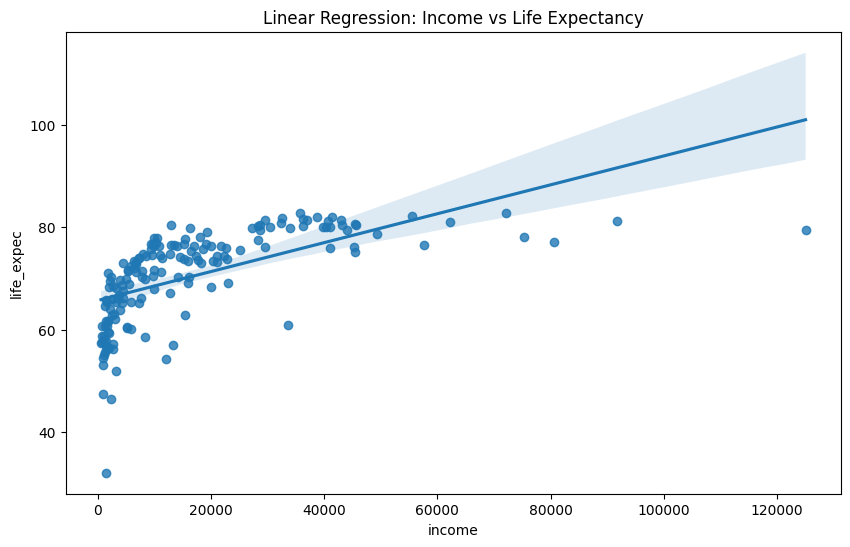

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(x='income', y='life_expec', data=df)
plt.title('Linear Regression: Income vs Life Expectancy')
plt.show()

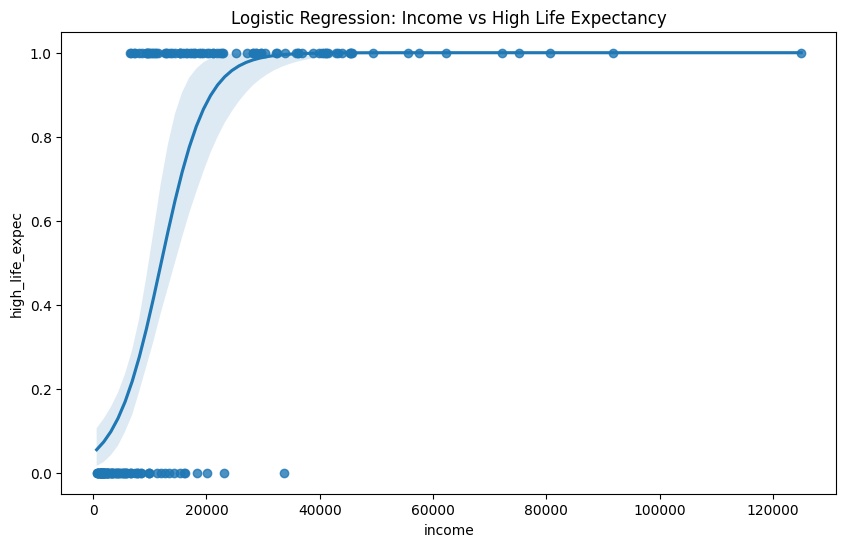

In [12]:
df['high_life_expec'] = (df['life_expec'] > df['life_expec'].median()).astype(int)

plt.figure(figsize=(10, 6))
sns.regplot(x='income', y='high_life_expec', data=df, logistic=True)
plt.title('Logistic Regression: Income vs High Life Expectancy')
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [15]:
df = pd.read_csv('/content/Country-data.csv')

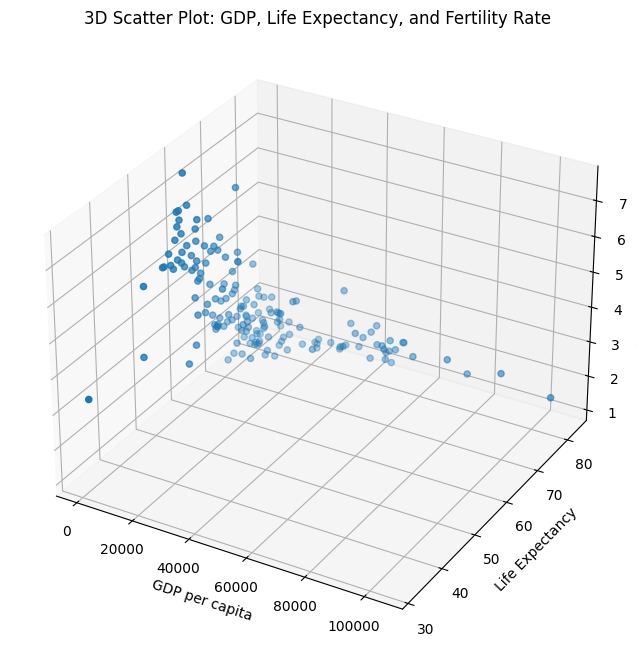

In [17]:
# 1. 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['gdpp'], df['life_expec'], df['total_fer'])
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('Total Fertility Rate')
plt.title('3D Scatter Plot: GDP, Life Expectancy, and Fertility Rate')
plt.show()
plt.close()

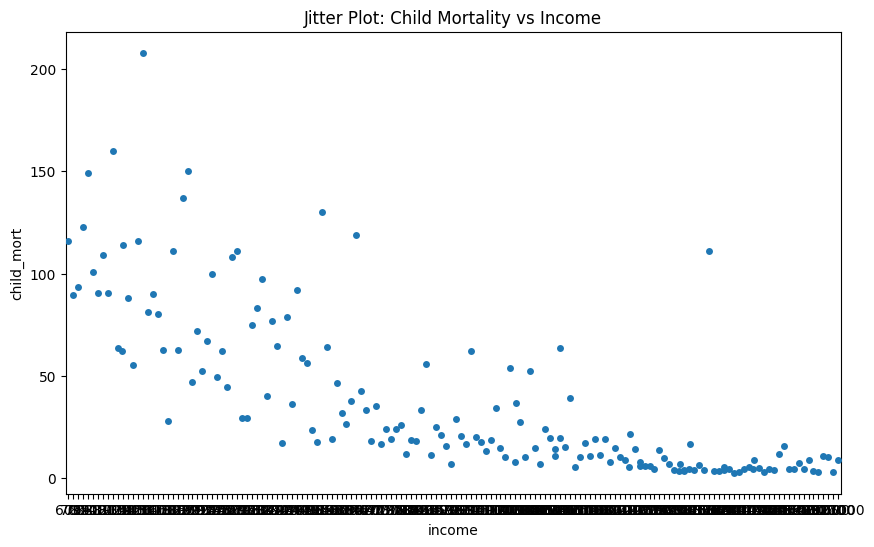

In [18]:
# 2. Jitter Plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='income', y='child_mort', data=df, jitter=True)
plt.title('Jitter Plot: Child Mortality vs Income')
plt.show()
plt.close()

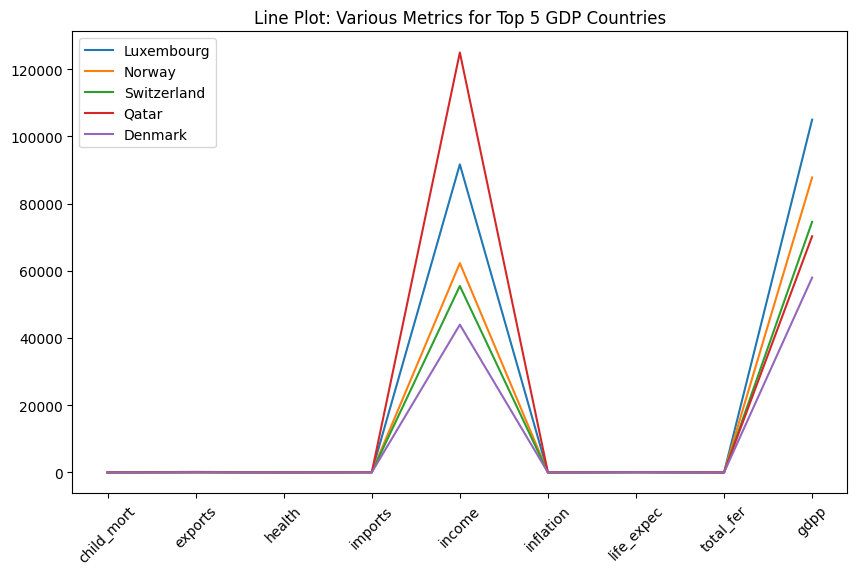

In [19]:
# 3. Line Plot (using top 5 countries by GDP for demonstration)
top_5 = df.nlargest(5, 'gdpp')
plt.figure(figsize=(10, 6))
for country in top_5['country']:
    country_data = df[df['country'] == country]
    plt.plot(country_data.columns[1:], country_data.iloc[0, 1:], label=country)
plt.legend()
plt.title('Line Plot: Various Metrics for Top 5 GDP Countries')
plt.xticks(rotation=45)
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

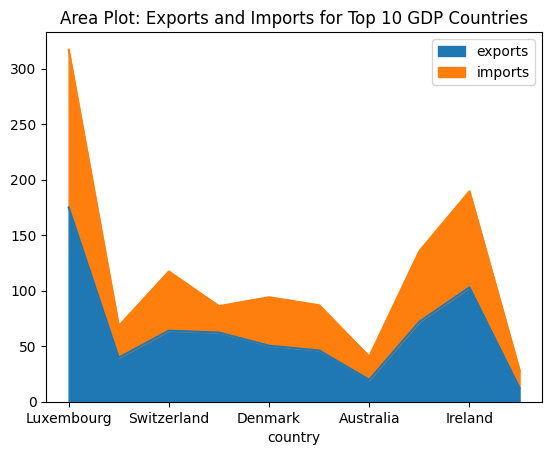

In [20]:
# 4. Area Plot
plt.figure(figsize=(10, 6))
df.sort_values('gdpp', ascending=False).head(10).plot.area(x='country', y=['exports', 'imports'])
plt.title('Area Plot: Exports and Imports for Top 10 GDP Countries')
plt.show()
plt.close()

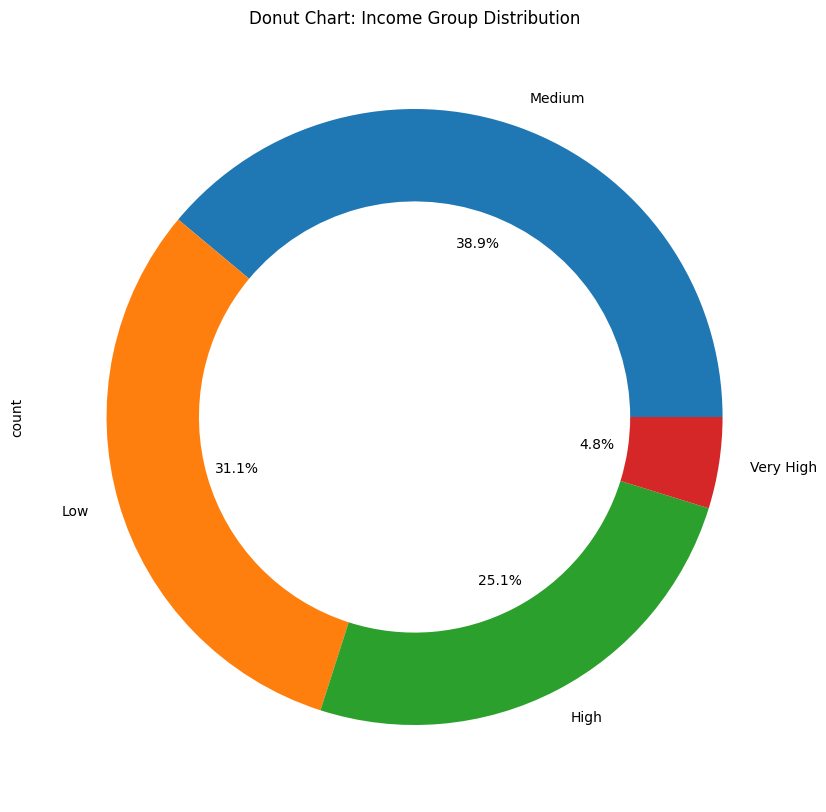

In [25]:
# 6. Donut Chart
plt.figure(figsize=(10, 10))
income_groups = pd.cut(df['income'], bins=[0, 5000, 20000, 50000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
income_groups.value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.3)) # Use wedgeprops to create the donut hole
plt.title('Donut Chart: Income Group Distribution')
plt.show()
plt.close()